# Application de l'algorithme de détection de faux billets
Ce notebook présente l'application de l'algorithme de détection de faux billets sur des données de production. Les données de production sont chargées dans un dataframe pandas. Le modèle entraîné est chargé à partir d'un fichier pickle. Les données sont préparées pour l'application du modèle. Les prédictions sont effectuées et les résultats sont sauvegardés dans un fichier csv. Les résultats sont affichés sous forme de graphiques.

# Chargement des librairies

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du modèle
On charge le modèle entraîné à partir d'un fichier pickle. Le fichier pickle contient l'objet python contenant le modèle entraîné.

In [3]:
# Chargement du modèle
filename = 'model_LogisticRegression.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Chargement des données de production
C'est ici que les données de production sont chargées dans un dataframe pandas. Les données sont préparées pour l'application du modèle. Les prédictions sont effectuées et les résultats sont sauvegardés dans un fichier csv. Les résultats sont affichés sous forme de graphiques.

Dans le bloc de code suivant, il faut mettre le nom du fichier csv contenant les données de production. Le fichier csv doit être dans le même répertoire que le notebook.

In [4]:
# Chargement des données
data = pd.read_csv('billets_production.csv', sep=',', decimal='.')
data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


On supprime les valeurs manquantes

In [5]:
# suppression des valeurs manquantes
data_clean = data.dropna()

# Prediction des faux billets
On utilise le modèle chargé pour prédire les classes des billets. On calcule les probabilités de prédiction. On crée un dataframe avec les résultats. On sauvegarde les résultats dans un fichier csv. On affiche les résultats sous forme de graphiques.

In [6]:
# utilisation du modèle pour prédire les classes
y_pred = loaded_model.predict(data_clean.select_dtypes(exclude='object'))
y_pred

array([0, 0, 0, 1, 1])

In [7]:
# calcul des probabilités
proba_pred = loaded_model.predict_proba(data_clean.select_dtypes(exclude='object'))
proba_pred

array([[9.93887347e-01, 6.11265256e-03],
       [9.98885579e-01, 1.11442106e-03],
       [9.98586040e-01, 1.41396005e-03],
       [8.66713459e-02, 9.13328654e-01],
       [4.41190642e-04, 9.99558809e-01]])

In [8]:
# création d'un dataframe avec les résultats
data_result = data_clean.copy()
data_result['y_pred'] = y_pred
code = {1 : 'Vrai billet', 0 : 'Faux billet'}

data_result['y_pred'] = data_result['y_pred'].map(code)

# ajout des probabilités
data_result['proba_pred_faux'] = proba_pred[:,0]
data_result['proba_pred_vrai'] = proba_pred[:,1]

data_result.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id,y_pred,proba_pred_faux,proba_pred_vrai
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Faux billet,0.993887,0.006113
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Faux billet,0.998886,0.001114
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Faux billet,0.998586,0.001414
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,Vrai billet,0.086671,0.913329
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,Vrai billet,0.000441,0.999559


On obtient le classemement des billetss, ainsi que la probabilité de prédiction pour chaque classe. On peut ainsi identifier les billets qui sont prédits comme faux billets.

# Sauvegarde des résultats

In [9]:
# sauvegarde des résultats
data_result.to_csv('resultats.csv', sep=';', decimal='.', index=False)


# Affichage des résultats avec le nombre de billets par classe

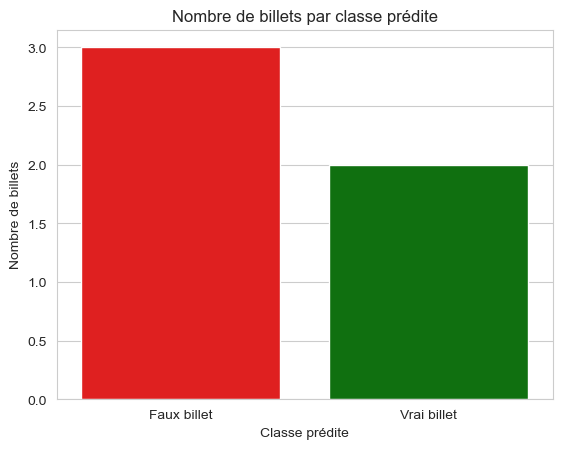

In [11]:
# Affichage des résultats avec le nombre de billets par classe
custom_palette = {'Vrai billet': 'green', 'Faux billet': 'red'}
order = data_result['y_pred'].value_counts().index

sns.countplot(x='y_pred', data=data_result, palette=custom_palette, order=order)


plt.title('Nombre de billets par classe prédite')
plt.xlabel('Classe prédite')
plt.ylabel('Nombre de billets')
plt.show()


In [12]:
# liste de faux billets
data_result[data_result['y_pred'] == 'Faux billet']

,diagonal,height_left,height_right,margin_low,margin_up,length,id,y_pred,proba_pred_faux,proba_pred_vrai
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Faux billet,0.993887,0.006113
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Faux billet,0.998886,0.001114
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Faux billet,0.998586,0.001414


In [14]:
# liste de vrais billets
data_result[data_result['y_pred'] == 'Vrai billet']


,diagonal,height_left,height_right,margin_low,margin_up,length,id,y_pred,proba_pred_faux,proba_pred_vrai
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,Vrai billet,0.086671,0.913329
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,Vrai billet,0.000441,0.999559
